# K-means, BIC, AIC

## Data

In [1]:
import numpy as np
from numpy.random import normal
from collections import namedtuple

Data = namedtuple('Data', 'X y')

np.random.seed(37)

def get_data(means, variances, labels, N=1000):
    def get_X(sample_means, sample_variances, N):
        return np.hstack([normal(m, v, N).reshape(-1, 1) for m, v in zip(sample_means, sample_variances)])

    def get_y(label, N):
        return np.full(N, label, dtype=np.int)

    X = np.vstack([get_X(m, v, N) for m, v in zip(means, variances)])
    y = np.hstack([get_y(label, N) for label in labels])

    return Data(X, y)

# training
means = [
    [5.0, 5.0],
    [99.0, 99.0],
    [15.0, 20.0]
]
variances = [
    [1.0, 1.0],
    [1.0, 1.0],
    [1.0, 1.0]
]
labels = range(len(means))

X, y = get_data(means=means, variances=variances, labels=labels)

print(f'X shape = {X.shape}, y shape {y.shape}')

## BIC, AIC and more

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.mixture import GaussianMixture

def get_km(k, X):
    km = KMeans(n_clusters=k, random_state=37)
    km.fit(X)
    return km

def get_bic_aic(k, X):
    gmm = GaussianMixture(n_components=k, init_params='kmeans')
    gmm.fit(X)
    return gmm.bic(X), gmm.aic(X)

def get_score(k, X, y):
    km = get_km(k, X)
    y_pred = km.predict(X)
    bic, aic = get_bic_aic(k, X)
    sil = silhouette_score(X, y_pred)
    db = davies_bouldin_score(X, y_pred)
    hom = homogeneity_score(y, y_pred)
    com = completeness_score(y, y_pred)
    vms = v_measure_score(y, y_pred)
    cal = calinski_harabasz_score(X, y_pred)
    return k, bic, aic, sil, db, hom, com, vms, cal

The meaning of the scores.

* `BIC` lower is better
* `AIC` lower is better
* `silhouette` higher is better
* `davies` lower is better
* `homogeneity` higher is better
* `completeness` higher is better
* `v-measure` higher is better
* `calinski` higher is better

In [3]:
import pandas as pd

df = pd.DataFrame([get_score(k, X, y) for k in range(2, 11)], 
                  columns=['k', 'BIC', 'AIC', 'silhouette', 
                           'davies', 'homogeneity', 
                           'completeness', 'vmeasure', 'calinski'])
df

,k,BIC,AIC,silhouette,davies,homogeneity,completeness,vmeasure,calinski
0,2,29713.687099,29647.617056,0.941677,0.082989,0.57938,1.000000,0.733680,1.827224e+05
1,3,23709.628278,23607.520029,0.929479,0.099672,1.00000,1.000000,1.000000,2.623227e+06
2,4,23762.155634,23624.009180,0.730280,0.668177,1.00000,0.826384,0.904940,1.965043e+06
3,5,23803.846465,23629.661806,0.505268,1.034578,1.00000,0.704436,0.826592,1.671440e+06
4,6,23853.640177,23643.417313,0.306454,1.262294,1.00000,0.613936,0.760794,1.542195e+06
5,7,23894.454962,23648.193892,0.314889,1.119986,1.00000,0.571017,0.726939,1.443194e+06
6,8,23939.402952,23657.103676,0.324948,1.011260,1.00000,0.533102,0.695455,1.412667e+06
7,9,23984.268435,23665.930954,0.326090,0.955985,1.00000,0.500374,0.666999,1.407948e+06
8,10,24027.709406,23673.333719,0.325688,0.945463,1.00000,0.479731,0.648403,1.362299e+06


## Visualize

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_result(df, y1, y2, x):
    fig, ax1 = plt.subplots(figsize=(6, 3))
    ax1.plot(df[x], df[y1], color='tab:red')
    ax1.set_xlabel(x)
    ax1.set_ylabel(y1, color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()
    ax2.plot(df[x], df[y2], color='tab:blue')
    ax2.set_ylabel(y2, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')

### BIC vs silhouette

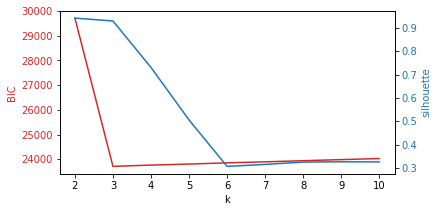

In [5]:
plot_result(df, 'BIC', 'silhouette', 'k')

### BIC vs Davies-Bouldin

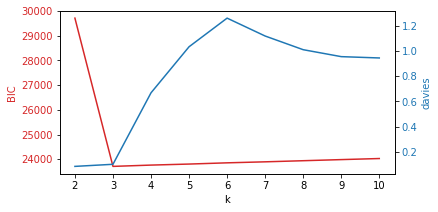

In [6]:
plot_result(df, 'BIC', 'davies', 'k')

### BIC vs homogeneity

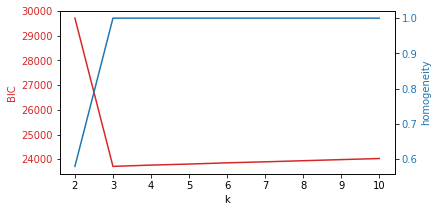

In [7]:
plot_result(df, 'BIC', 'homogeneity', 'k')

### BIC vs completeness

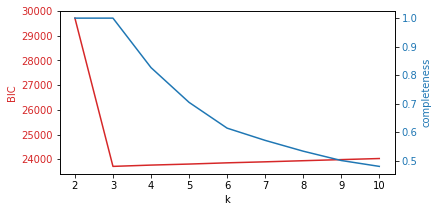

In [8]:
plot_result(df, 'BIC', 'completeness', 'k')

### BIC vs Calinski-Harabasz

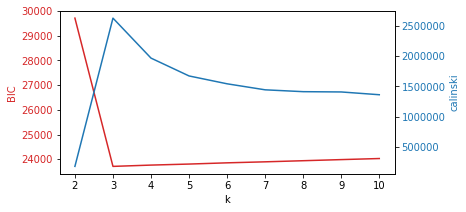

In [9]:
plot_result(df, 'BIC', 'calinski', 'k')

### BIC vs v-measure

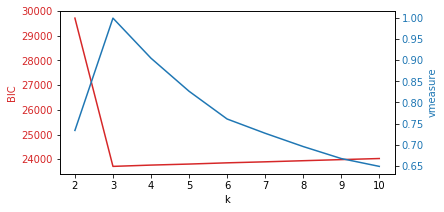

In [10]:
plot_result(df, 'BIC', 'vmeasure', 'k')